In [1]:

import re
from dotenv import load_dotenv
load_dotenv()
from datasets import load_dataset
import numpy as np
import pandas as pd
import os
import torch
import re
from tqdm import tqdm


In [2]:
# scp -r loriss21cs@slurm01.vda.univie.ac.at:/srv/home/users/loriss21cs/babylm/mean_influence mean_influence

In [3]:
# input = "./mean_influence_divided_by_len_test/OLMo-2-1124-7B-SFT"
# for dir in tqdm(list(os.listdir(input))):
#     dataset_name = None
#     split = None
#     print(dir)
#     l = dir.split("]_")[-1]
  
#     if "train" in l:
#         l = l.split("_train[")
#         dataset_name = "anasedova/"+l[0]
#         split = "train["+l[1]
#     else:
#         l = l.split("_test[")
#         dataset_name = "anasedova/"+l[0]
#         split = "test["+l[1]

    
#     d = load_dataset(dataset_name, split=split)
#     print(dir, dataset_name, split, len(d))
#     path_in = os.path.join(input, dir, "main")
#     path_out = os.path.join("./mean_influence/OLMo-2-1124-7B-SFT", dir, "main")
#     os.makedirs(os.path.dirname(path_out))
#     torch.save(torch.load(path_in,weights_only=True,map_location="cpu") * len(d), path_out)

In [4]:
import numpy as np


In [5]:
import os

directory = "./mean_influence/OLMo-2-1124-7B-SFT/"


empty_subfolders = [
    os.path.join(root, d) for root, dirs, files in os.walk(directory) for d in dirs
    if not os.listdir(os.path.join(root, d)) 
]

for folder in empty_subfolders:
    if "dev" not in folder:
        print("rmdir",folder)


In [6]:
os.listdir(directory)

['tulu-3-sft-olmo-2-mixture_train[68%:69%]_tulu_3_underspecified_input_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[26%:27%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[13%:14%]_tulu_3_formatting_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[3%:4%]_tulu_3_no_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[35%:36%]_tulu_3_incorrect_output_errors_train[0%:100%]',
 'tulu_3_all_errors_train[92%:93%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[77%:78%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu_3_all_errors_train[49%:50%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[23%:24%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu_3_all_errors_train[54%:55%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[15%:16%]_tulu-3-sft-mixture_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[33%:34%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[61%

In [7]:
directory = "./mean_influence/OLMo-2-1124-7B-SFT/"
prefix = "tulu-3-sft-olmo-2-mixture_train[26%:27%]_"
test_sets = [("anasedova/"+"_".join(dir.replace(prefix,"").split("_")[0:-1]), dir.replace(prefix,"").split("_")[-1]) for dir in  os.listdir(directory) if prefix in dir]
test_sets.append(("anasedova/olmes_tulu_3_unseen", "test[0%:100%]"))

In [8]:
# import datasets 
# schema = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test").features

# folder = "./verb_confidence_exp_t/retrieved_documents"
# candidate_schema = None 
# for candidate_dataset in os.listdir(folder):
#     candidate_schema = datasets.load_from_disk(os.path.join(folder,candidate_dataset))

#     break

In [9]:
# schema = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test").features

In [10]:
# schema

In [11]:
# for query_col in [key for key in schema.keys() if "_query" in key]:
#     schema[query_col] = schema["response_query"]

In [12]:
# dataset = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test")
# dataset = dataset.map(features.encode_example, features=features)

In [13]:
# features

In [14]:
# set(error).difference(fine)

In [15]:
# set(fine).difference(error)

In [16]:
# del test_sets[test_sets.index(('anasedova/tulu_3_no_errors', 'train[0%100%]'))]
# del test_sets[test_sets.index(('anasedova/tulu-3-sft-mixture', 'train[0%100%]'))]

In [17]:
# test_sets = [t for t in test_sets if "_tulu_3_formatting_errors_train" not in t]

In [18]:
LOAD_TEXT = True
REUSE_SAVED = True

In [19]:
import dask.dataframe as dd
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers=64, 
                threads_per_worker=10,
                memory_limit='124GB')          # Fully-featured local Dask cluster
client = cluster.get_client()

In [20]:
'gesfdvycx'

'gesfdvycx'

In [21]:
' ssh -L 8787:dgx1:8787 loriss21cs@slurm.vda.univie.ac.at'

' ssh -L 8787:dgx1:8787 loriss21cs@slurm.vda.univie.ac.at'

In [22]:
# from datasets import Dataset


# checkpoint = "main"

# df_all_errors = dd.from_pandas(load_dataset("anasedova/tulu_3_all_errors_upd", split="train").select_columns(["ordinal_id", "noise_type"]).to_pandas()).repartition(npartitions=14)
# dff = dd.read_parquet("hf://datasets/allenai/tulu-3-sft-olmo-2-mixture")#dd.from_pandas(load_dataset("allenai/tulu-3-sft-olmo-2-mixture", split="train[0%:100%]").to_pandas())
# dff = dff.reset_index(drop=True).repartition(npartitions=14)
# def load_data(train_dataset_name, dataset_train_split, test_dataset_name, dataset_test_split, model_name, influence_output_dir="./mean_influence", checkpoint="main"):

#     assert train_dataset_name == "allenai/tulu-3-sft-olmo-2-mixture", "move loading inside function"
#     influence_output_dir = os.path.join(influence_output_dir, os.path.basename(model_name))
 
#    # dataset = load_dataset(train_dataset_name, split=dataset_train_split).select_columns(["id"])
#     # len_dataset_test = len(load_dataset(test_dataset_name, split=dataset_test_split))
    
#     pattern = re.compile(rf"{re.escape(os.path.basename(train_dataset_name))}_.*_{re.escape(os.path.basename(test_dataset_name))}")

#     train_splits = [dataset_train_split.split("[")[0] + f"[{i}%:{i + 100 // 100}%]" for i in range(0, 100, 100 // 100)]

#     files = [file for file in os.listdir(influence_output_dir) if pattern.search(file)]

#     # verify all files are ready
#     for train_split in train_splits:
#         if not(any([os.path.basename(train_dataset_name) + "_" + train_split in file for file in files])):
#             print(f"python process_gradients.py {model_name} {train_dataset_name} {0} --dataset_train_split={train_split} --dataset_test={test_dataset_name} --dataset_test_split={dataset_test_split} --mode=mean  --batch_size=10")
#             raise FileNotFoundError
        
        

#     for result_superbatch in files:
#         try:
#             torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu")
#         except:
#             print(result_superbatch)
    

#     idx, results_superbatches = zip(*sorted([(int(re.search(r"\[(\d*)\%", result_superbatch).group(1)), torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu").numpy().flatten()) for result_superbatch in files], key=lambda x: x[0]))



#     influence_scores = np.concat(results_superbatches)
#     # influence_scores = influence_scores * len_dataset_test # TODO hotfix

#     df =pd.DataFrame(influence_scores)
#     df.columns = ["influence"]

#     df = df.reindex(sorted(df.columns, reverse=False), axis=1)
#     df.insert(0, 'ordinal_id', range(0, len(df)))
#     df = dd.from_pandas(df).reset_index(drop=True).repartition(npartitions=14)
    
#     print(len(df.compute()),len(dff.compute()))
   
#     df = dd.concat([df,dff], axis=1)
    
#     # TODO hotfix as old influence datasets lack noise_type col
#     display(df.compute())
#     if train_dataset_name == "allenai/tulu-3-sft-olmo-2-mixture":
#         df = df.merge(df_all_errors[["noise_type","ordinal_id"]], how="left", on="ordinal_id",)
    
#     return df

# dfs = []
# for i, (test_dataset_name, test_split) in enumerate(test_sets[0:2]):
#     print(i)
#     df = load_data(
#         "allenai/tulu-3-sft-olmo-2-mixture", 
#         "train[0%:100%]",
#         test_dataset_name,
#         test_split,
#         "allenai/OLMo-2-1124-7B-SFT",
#         )
   
#     df["test_dataset"] = test_dataset_name
#     df = df.astype({
#     "ordinal_id": "int64",
#     "influence": "float64",
#     "id": "string",  
#     "messages": "string",
#     "source": "string",  
#     "dataset": "string",  
#     "noise_type": "string",  
#     "test_dataset": "string",
   
# })
#     display(df.compute())
#     dfs.append(df)



# df = dd.concat(dfs)
# df

In [23]:
from datasets import Dataset


checkpoint = "main"

df_all_errors = load_dataset("anasedova/tulu_3_all_errors_upd", split="train").to_pandas()
tulu = load_dataset("allenai/tulu-3-sft-olmo-2-mixture", split="train[0%:100%]").to_pandas()
tulu["ordinal_id"] = range(0,len(tulu))

df = tulu.set_index("ordinal_id").join(df_all_errors.drop_duplicates(subset=["ordinal_id"]).set_index("ordinal_id"), how="left")
df["noise_type"] = df["noise_type"].fillna(value="no")

In [24]:
for i, (test_dataset_name, test_split) in enumerate(test_sets):
    print(i)
    train_dataset_name = "allenai/tulu-3-sft-olmo-2-mixture"
    dataset_train_split = "train[0%:100%]"
  
    model_name = "allenai/OLMo-2-1124-7B-SFT"
  
    influence_output_dir = os.path.join("./mean_influence", os.path.basename(model_name))



    pattern = re.compile(rf"{re.escape(os.path.basename(train_dataset_name))}_.*_{re.escape(os.path.basename(test_dataset_name))}")

    train_splits = [dataset_train_split.split("[")[0] + f"[{i}%:{i + 100 // 100}%]" for i in range(0, 100, 100 // 100)]

    files = [file for file in os.listdir(influence_output_dir) if pattern.search(file)]

    # verify all files are ready
    for train_split in train_splits:
        if not(any([os.path.basename(train_dataset_name) + "_" + train_split in file for file in files])):
            print(f"python process_gradients.py {model_name} {train_dataset_name} {0} --dataset_train_split={train_split} --dataset_test={test_dataset_name} --dataset_test_split={dataset_test_split} --mode=mean  --batch_size=10")
            raise FileNotFoundError
        
        

    for result_superbatch in files:
        try:
            torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu")
        except:
            print(result_superbatch)
    

    idx, results_superbatches = zip(*sorted([(int(re.search(r"\[(\d*)\%", result_superbatch).group(1)), torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu").numpy().flatten()) for result_superbatch in files], key=lambda x: x[0]))



 
    # influence_scores = influence_scores * len_dataset_test # TODO hotfix
    df["influence_"+test_dataset_name] = np.concat(results_superbatches)
    # df =pd.DataFrame(influence_scores)
    # df.columns = ["influence"]

df.to_parquet("/srv/home/groups/dm/share/results_noise/results")  

0
1
2
3
4
5
6
7
8


In [25]:
df = pd.melt(df, id_vars=[col for col in df.columns if "influence" not in col],value_vars=[col for col in df.columns if "influence" in col], var_name="test_dataset")
df["test_dataset"] = df["test_dataset"].str.replace("influence_", "")


In [26]:
df = df.rename(columns={"value":"influence"})
df

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence
0,oasst1_5921,[{'content': 'Create a snippet of Terraform HC...,ai2-adapt-dev/oasst1_converted,None,oasst1_5921,Create a snippet of Terraform HCL code that cr...,"Sure, here's an example Terraform HCL code tha...",underspecified_input,0.0,anasedova/tulu_3_factual_errors,0.018311
1,oasst1_1096,[{'content': '¿Por qué crees que cada año es m...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.034180
2,oasst1_1752,[{'content': 'Nenn mir einen lustigen Witz übe...,ai2-adapt-dev/oasst1_converted,None,oasst1_1752,Nenn mir einen lustigen Witz über Polen.,Was ist die am wenigsten besuchte Einrichtung ...,incorrect_output,2.0,anasedova/tulu_3_factual_errors,0.259766
3,oasst1_2492,[{'content': 'Cuál es equivalente a una bombil...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.049072
4,oasst1_4628,[{'content': 'Com es fa una truita de patates?...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.038818
...,...,...,...,...,...,...,...,...,...,...,...
7514747,hard_coded_19,[{'content': 'Draw me an ASCII art logo for yo...,None,hard_coded,hard_coded_19,Draw me an ASCII art logo for yourself.,____o__ __o____ o ...,incorrect_output,938373.0,anasedova/tulu-3-sft-mixture,0.036133
7514748,hard_coded_20,"[{'content': 'Draw me an ASCII art for Ai2.', ...",None,hard_coded,hard_coded_20,Draw me an ASCII art for Ai2.,$$$$$$\ $$\ $$$$$$\ \n$$ __$$\ \__|$$ __...,incorrect_output,938489.0,anasedova/tulu-3-sft-mixture,0.046631
7514749,hard_coded_21,"[{'content': 'What is your favorite drink?', '...",None,hard_coded,hard_coded_21,What is your favorite drink?,I'm just a language model and don't have drink...,incorrect_output,938536.0,anasedova/tulu-3-sft-mixture,0.134766
7514750,hard_coded_22,"[{'content': 'Hi, how are you?', 'role': 'user...",None,hard_coded,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.231445


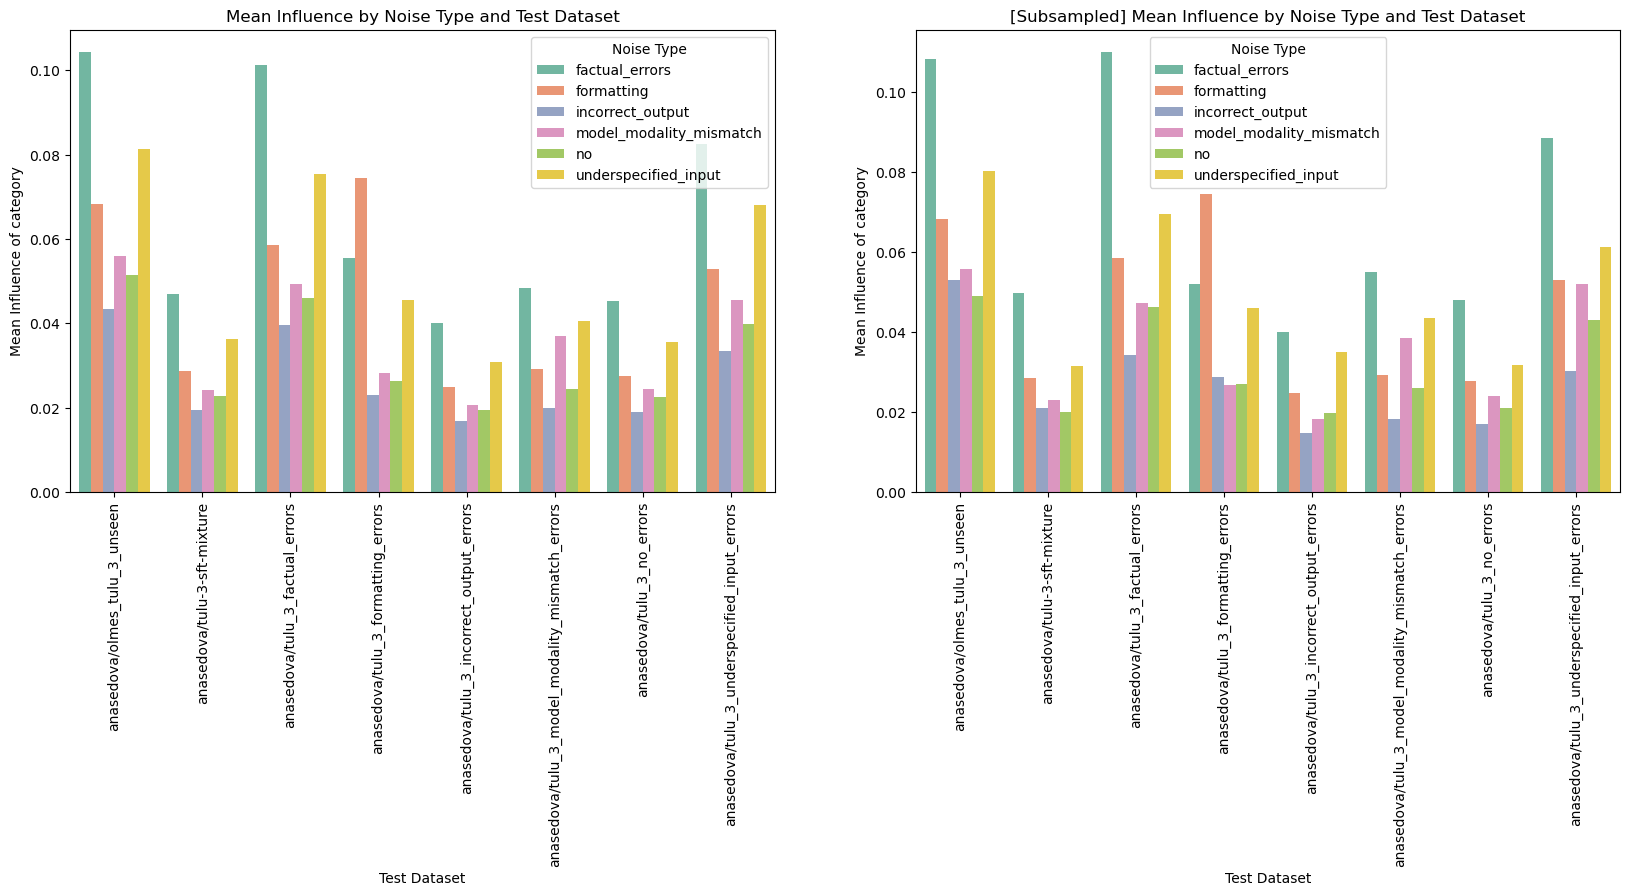

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(20, 6))


grouped = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[0])
axes[0].set_title("Mean Influence by Noise Type and Test Dataset")
axes[0].set_xlabel("Test Dataset")
axes[0].set_ylabel("Mean Influence of category")
axes[0].legend(title='Noise Type')
axes[0].tick_params(axis='x', labelrotation=90)


t = df.groupby("noise_type").sample(df.groupby("noise_type").size().min())
grouped = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[1])
axes[1].set_title("[Subsampled] Mean Influence by Noise Type and Test Dataset")
axes[1].set_xlabel("Test Dataset")
axes[1].set_ylabel("Mean Influence of category")
axes[1].legend(title='Noise Type')
axes[1].tick_params(axis='x', labelrotation=90)

# Adjust layout to prevent overlap


# Show the plots
plt.show()


In [28]:
len(df["noise_type"])

7514752

In [29]:
len(df.groupby("noise_type").sample(df.groupby("noise_type").size().min()))

6672

In [ ]:
df["prompt_lenght"] = df["prompt"].str.split().str.len()

In [31]:
# df.groupby("noise_type")["prompt_lenght"].plot.bar()

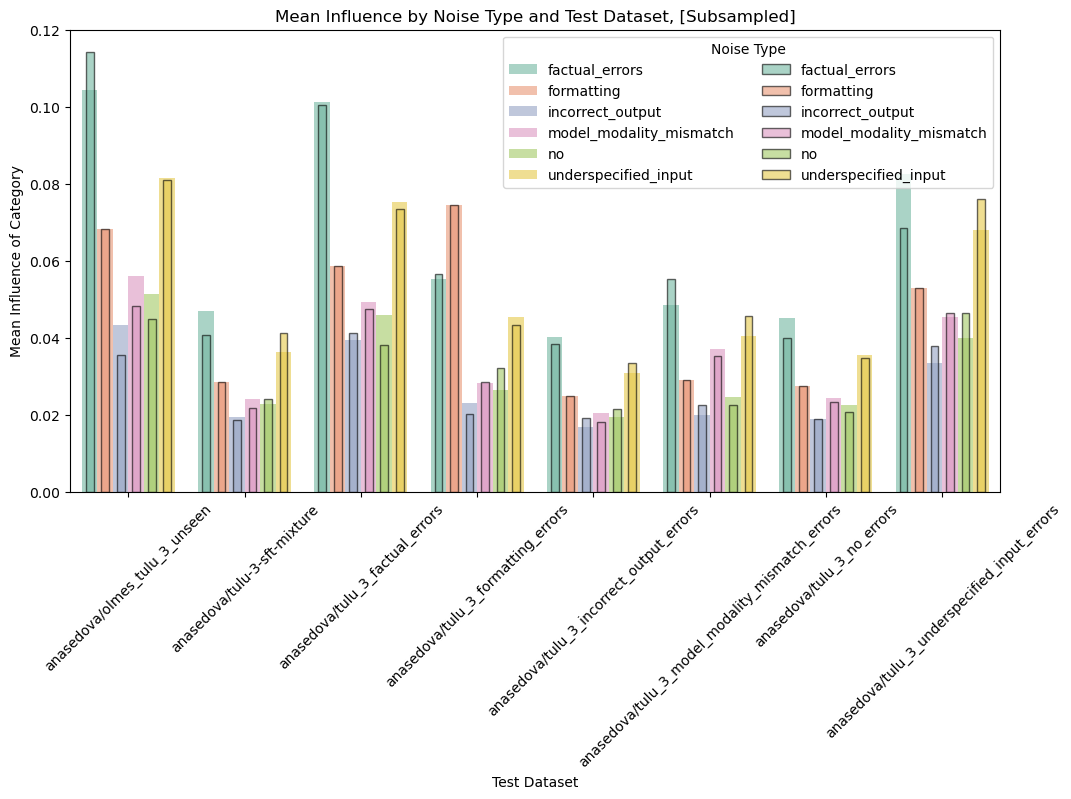

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))


grouped_full = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_full, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", alpha=0.6, ax=ax, dodge=True)


t = df.groupby("noise_type").sample(df.groupby("noise_type").size().min())
grouped_subsampled = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_subsampled, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", ax=ax,  gap=0.5,dodge=True, edgecolor="black", alpha=0.6)

# Labels and Title
ax.set_title("Mean Influence by Noise Type and Test Dataset, [Subsampled]")
ax.set_xlabel("Test Dataset")
ax.set_ylabel("Mean Influence of Category")
ax.legend(title='Noise Type',ncol=2)


ax.tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()


In [33]:
t = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()

Text(0.5, 1.0, 'Mean influence per noise_type (test noise_type = train noise_type)')

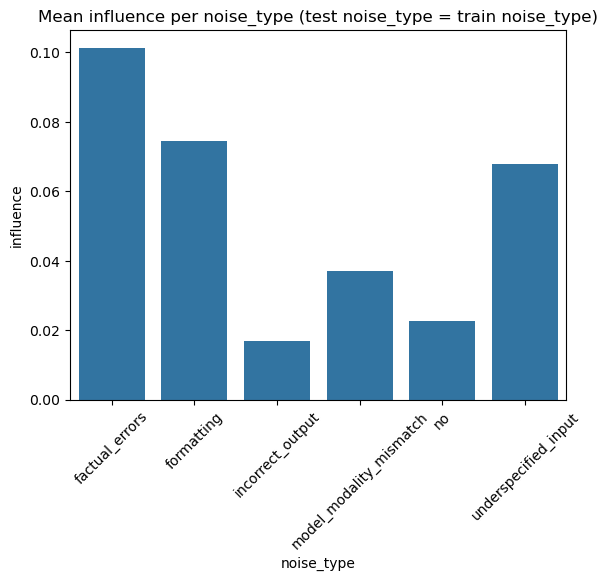

In [34]:
a = t[t.apply(lambda row: row["noise_type"] in row["test_dataset"],axis=1)]
sns.barplot(a, x="noise_type",y="influence")
plt.tick_params(axis='x', labelrotation=45)
plt.title("Mean influence per noise_type (test noise_type = train noise_type)")

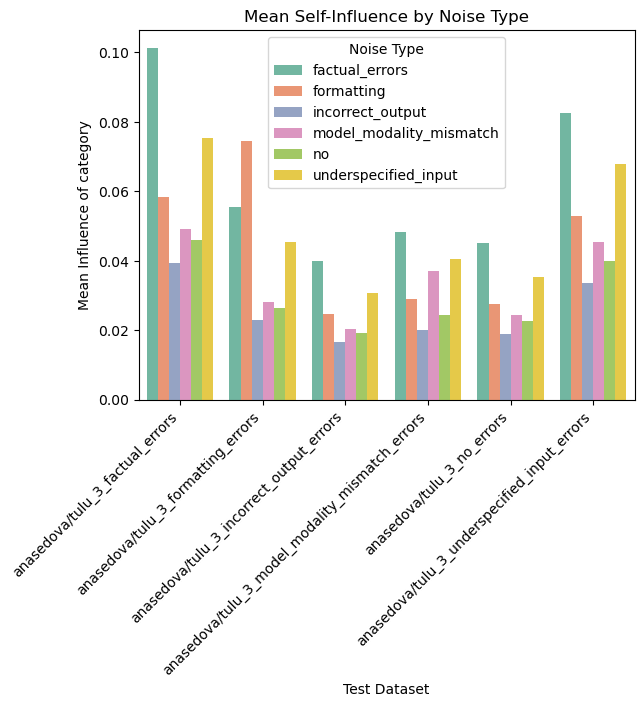

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

t = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
t = t[t["test_dataset"].str.contains('|'.join(t["noise_type"].dropna()), na=False)]

grouped = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()


sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2")

plt.title("Mean Self-Influence by Noise Type")
plt.xlabel("Test Dataset")
plt.ylabel("Mean Influence of category")
plt.legend(title='Noise Type')
plt.xticks(rotation=45, ha='right')
plt.show()


In [36]:
df.groupby("noise_type")[["prompt_lenght"]].describe()

prompt_lenght                                        \
                                count         mean          std  min    25%   
noise_type                                                                    
factual_errors               151144.0   405.268830  3514.442867  2.0   47.0   
formatting                     1112.0   668.978417  1629.230926  3.0   73.0   
incorrect_output            3721984.0  1231.890188  5464.056887  1.0  190.0   
model_modality_mismatch        7960.0   595.018090   931.404041  4.0   61.0   
no                                0.0          NaN          NaN  NaN    NaN   
underspecified_input         261656.0   462.627725  4297.335620  1.0   38.0   

                                                  
                           50%     75%       max  
noise_type                                        
factual_errors            82.0   229.0  238252.0  
formatting               252.0   568.0   10743.0  
incorrect_output         685.0  1208.0  425112.0  
model_modality_mismatch  151.0   708.0    7241.0  
no                         NaN     NaN       NaN  
underspecified_input      78.0   240.0  267363.0

In [37]:
df[df["test_dataset"] == "anasedova/tulu-3-sft-mixture"].sort_values(by="influence")

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence,prompt_lenght
7502712,ai2-adapt-dev/tulu_v3.9_aya_100k_88200,[{'content': 'Mutsara 1: Vamwe vaimbi vakakuru...,ai2-adapt-dev/tulu_v3.9_aya_100k,None,ai2-adapt-dev/tulu_v3.9_aya_100k_88200,Mutsara 1: Vamwe vaimbi vakakurumbira vanorati...,Hongu,incorrect_output,926509.0,anasedova/tulu-3-sft-mixture,-0.196289,401.0
7511880,ai2-adapt-dev/tulu_v3.9_aya_100k_97368,[{'content': 'Sheeg Nebigii Uu Soo Koriyey Nin...,ai2-adapt-dev/tulu_v3.9_aya_100k,None,ai2-adapt-dev/tulu_v3.9_aya_100k_97368,Sheeg Nebigii Uu Soo Koriyey Ninkii Ilaahnimad...,"Waa Nebi Muuse Cs, Oo Waxaa Soo Koriyey Cirfoo...",incorrect_output,935677.0,anasedova/tulu-3-sft-mixture,-0.069336,69.0
7285597,personahub_kj08gkdvfbfqabazjx6ou09n,[{'content': 'Explain how public perception of...,ai2-adapt-dev/personahub_ifdata_manual_seed_v3...,None,personahub_kj08gkdvfbfqabazjx6ou09n,Explain how public perception of controversial...,Public perception of controversial political f...,incorrect_output,709394.0,anasedova/tulu-3-sft-mixture,-0.067383,416.0
7283054,personahub_ne7zfmqvje9xq7npe5nws1st,[{'content': 'Provide a detailed explanation o...,ai2-adapt-dev/personahub_ifdata_manual_seed_v3...,None,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,-0.054443,NaN
6611154,ai2-adapt-dev/flan_v2_converted_28614,[{'content': 'Detailed Instructions: In this t...,ai2-adapt-dev/flan_v2_converted,None,ai2-adapt-dev/flan_v2_converted_28614,"Detailed Instructions: In this task, you are g...",personal,incorrect_output,35746.0,anasedova/tulu-3-sft-mixture,-0.052246,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7367969,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'no', 'role': 'user'}, {'content'...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,no,None,underspecified_input,791766.0,anasedova/tulu-3-sft-mixture,0.402344,2.0
7373295,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'What?', 'role': 'user'}, {'conte...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,What?,None,underspecified_input,797092.0,anasedova/tulu-3-sft-mixture,0.402344,5.0
7385434,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'Any others?', 'role': 'user'}, {...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,Any others?,None,underspecified_input,809231.0,anasedova/tulu-3-sft-mixture,0.406250,11.0
7351741,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'Any other tips?', 'role': 'user'...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,Any other tips?,None,underspecified_input,775538.0,anasedova/tulu-3-sft-mixture,0.437500,15.0


In [ ]:
sns.scatterplot(data=df.sample(frac=0.01,random_state=42), x="prompt_lenght", y="influence", hue="noise_type",alpha=0.6, )
plt.legend(loc='upper right')
plt.xlim(0,5000)

(0.0, 2000.0)

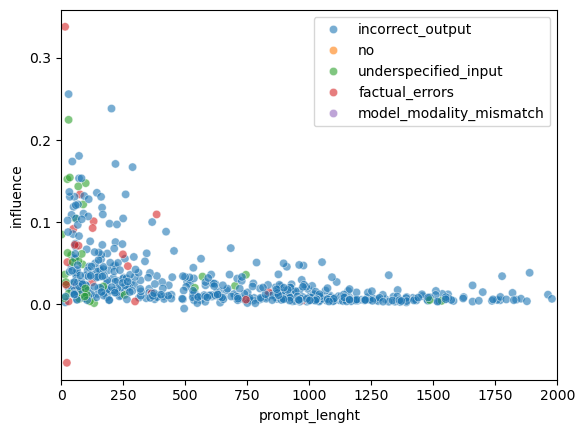

In [54]:
sns.scatterplot(data=df.sample(df.groupby("noise_type").size().min(),random_state=42), x="prompt_lenght", y="influence", hue="noise_type",alpha=0.6, )
plt.legend(loc='upper right')
plt.xlim(0,2000)

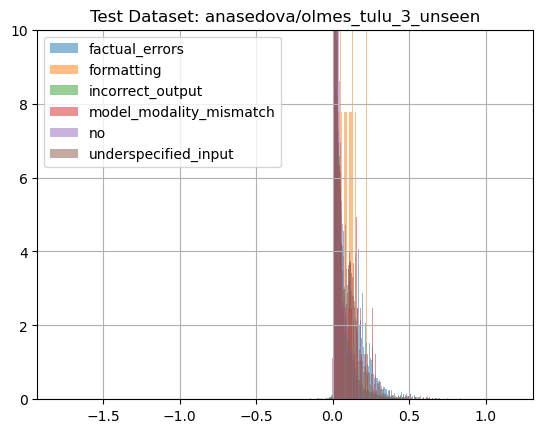

2025-03-12 14:01:04,304 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/site-packages/distributed/comm/tcp.py", line 226, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/site-packages/distributed/worker.py", line 1269, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/site-packages/distributed/utils_comm.py", line 416, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/srv/home/users/loriss21cs/venvs/baby

KeyboardInterrupt: 

2025-03-12 14:01:06,309 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/asyncio/base_events.py", line 686, in run_until_complete
    return future.result()
           ^^^^^^^^^^^^^^^
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/site-packages/distributed/nanny.py", line 985, in run
    await worker.finished()
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/site-packages/distributed/core.py", line 494, in finished
    await self._event_finished.wait()
  File "/srv/home/users/loriss21cs/venvs/babylm_venv/lib/python3.12/asyncio/locks.py", line 212, in w

In [ ]:
import matplotlib.pyplot as plt


unique_datasets = df["test_dataset"].unique()
num_datasets = len(unique_datasets)



for ax, (name, df_) in zip(axes, df.groupby(by="test_dataset")):
    df_.groupby(by="noise_type")["influence"].hist( legend=True, bins=500, density=True, alpha=0.5)
    plt.title(f"Test Dataset: {name}")
    plt.xlim(df["influence"].min(), df["influence"].max() * 0.3)
    plt.ylim(0,10)
    plt.show()


In [ ]:
afdyfrefdf.groupby(by="noise_type")["influence"].count()

NameError: name 'afdyfrefdf' is not defined

In [ ]:
df.groupby(by="noise_type")["influence"].describe()

In [ ]:
# ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("influence ~ C(noise_type)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_results = pairwise_tukeyhsd(df["influence"], df["noise_type"], alpha=0.05)

print(tukey_results)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for name, df_ in df.groupby(by="test_dataset"):
    tukey_results = pairwise_tukeyhsd(df_["influence"], df_["noise_type"], alpha=0.05)
    print(name)
    print(tukey_results)


In [ ]:
df

In [ ]:
import itertools
import pandas as pd
from scipy.stats import ks_2samp


ks_results = []
for a, b in itertools.combinations( df["group"].unique(), 2):
    group1 = df[df["group"] == a]["influence"]
    group2 = df[df["group"] == b]["influence"]
    # print(len(group1), len(group2))
    ks_stat, p_value = ks_2samp(group1, group2)
    ks_results.append([a, b, ks_stat, p_value, p_value < 0.05])
pd.DataFrame(ks_results, columns=["group1", "group2", "KS-stat", "p-adj", "reject"])



In [ ]:
You can now access the mean influence of any noise_category on any of the datasets, e.g.,

- "the mean influence underspecified_input[123] has on examples in olmes"
- "the mean influence examples from underspecified_input has on examples in olmes" `df.groupby("noise_type").mean()`
- "the mean influence of examples in tulu if prompted with examples from underspecified_input"
- etc

What combinations do you want (there are 7*7)?
Should I just provide you one big dataframe with "influence", "example a", "noise type a", "example b", "noise type b" (noise_type is "no" if not present in datasets or from olmes)?
So that you can compare e.g. group means?